
<h1 align= "center" style="font-family:Times New Roman (Headings CS); border: 1px solid pink; text-shadow: 1px 2px 2px pink; font-size: 35px;"> Customer Churn</h1>

---



### Importing the needed Libraries:

In [3]:
## Basic :
import pandas as pd
import numpy as np

## Visualization :
import seaborn as sns
import matplotlib.pyplot as plt

## Prerporcessing :
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer

## Model Building & Evaluation :
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.kernel_approximation import Nystroem

## Additional :
import warnings





### Reading the data:



In [4]:
url = '/content/drive/MyDrive/Customer_Churn.csv'

data = pd.read_csv(url)

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes




## Exploratory Data Analysis(EDA):



In [6]:
data.drop(["customerID"], inplace = True, axis = 1)

### To achieve the optimal result, we need to understand our data.


> This can happen by visualizing the features in the data(Numerical Features):





> Or using this way, for each feature:



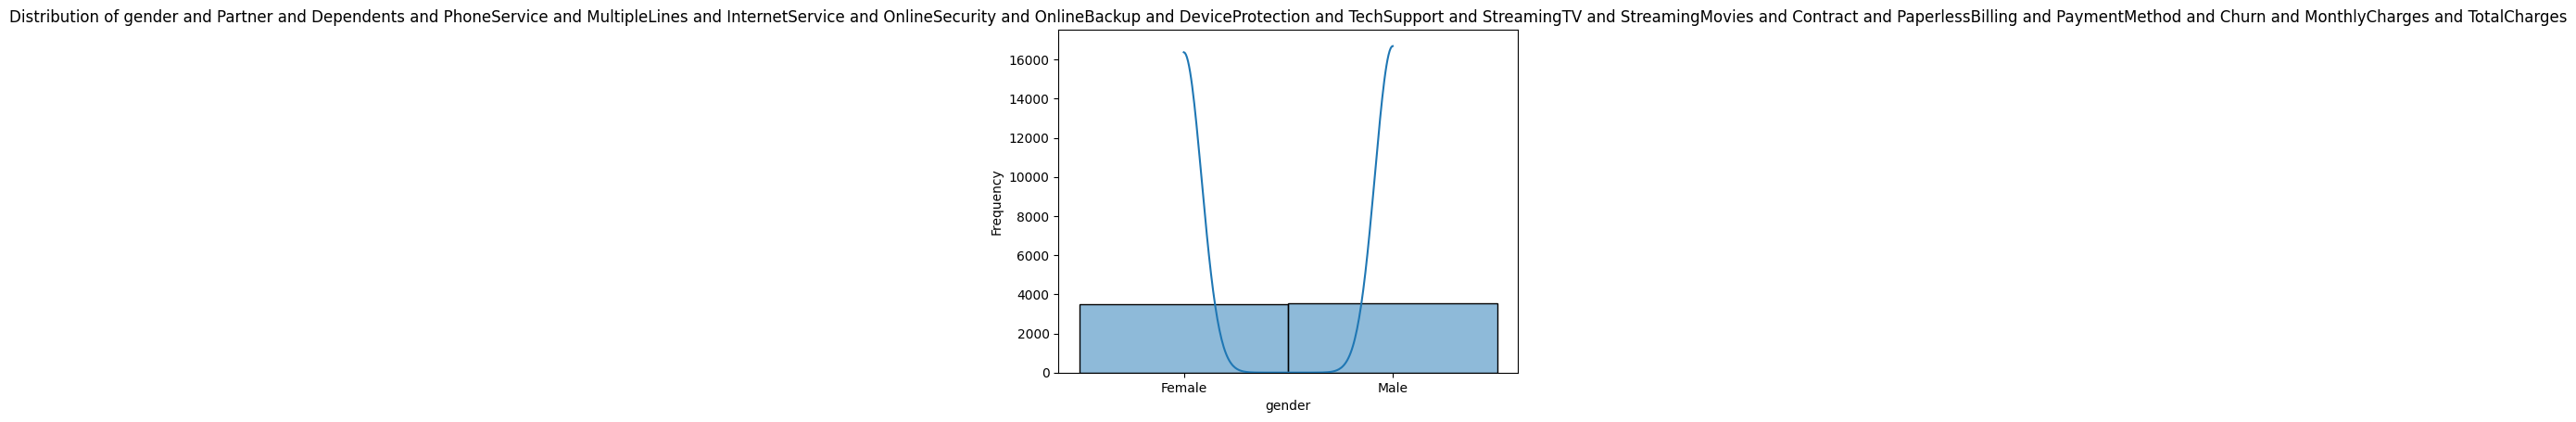

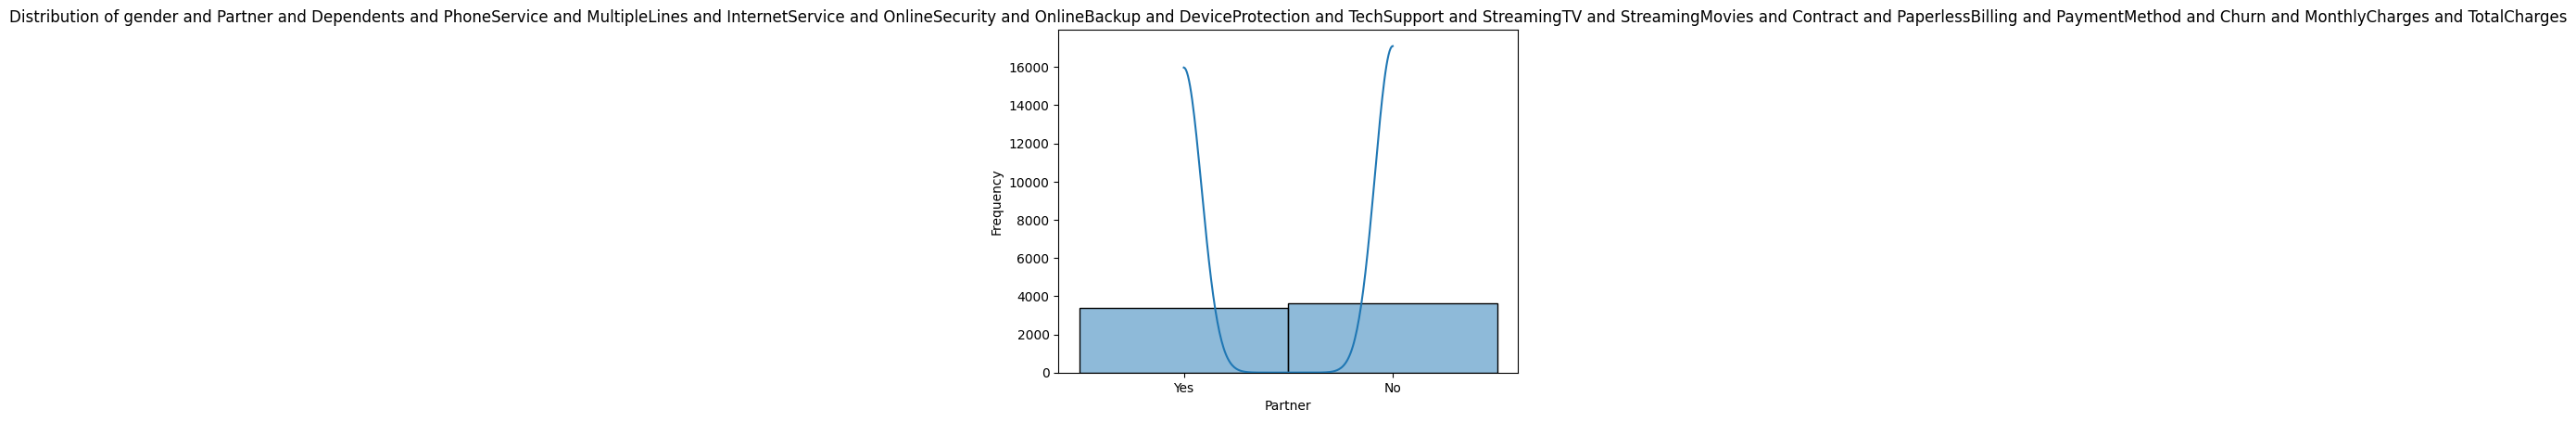

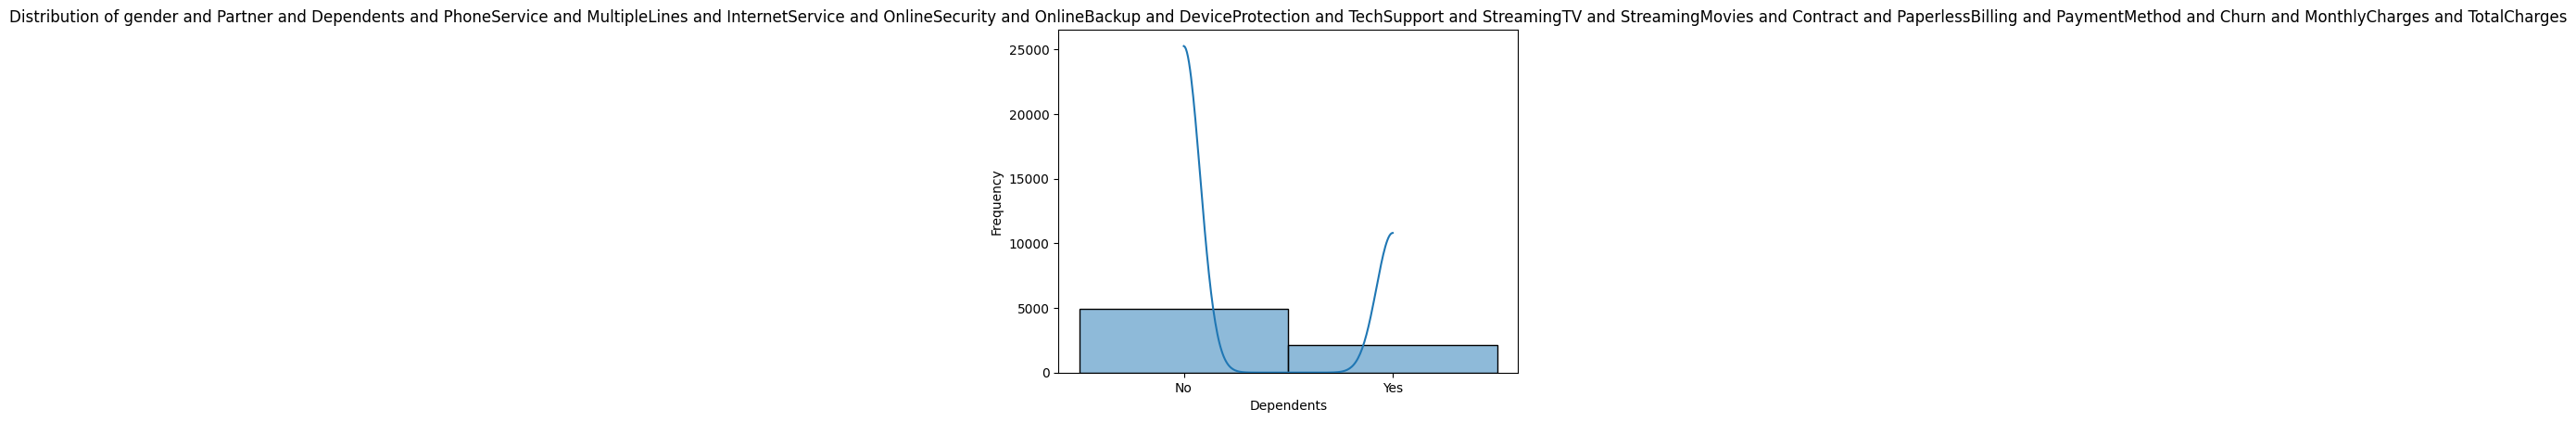

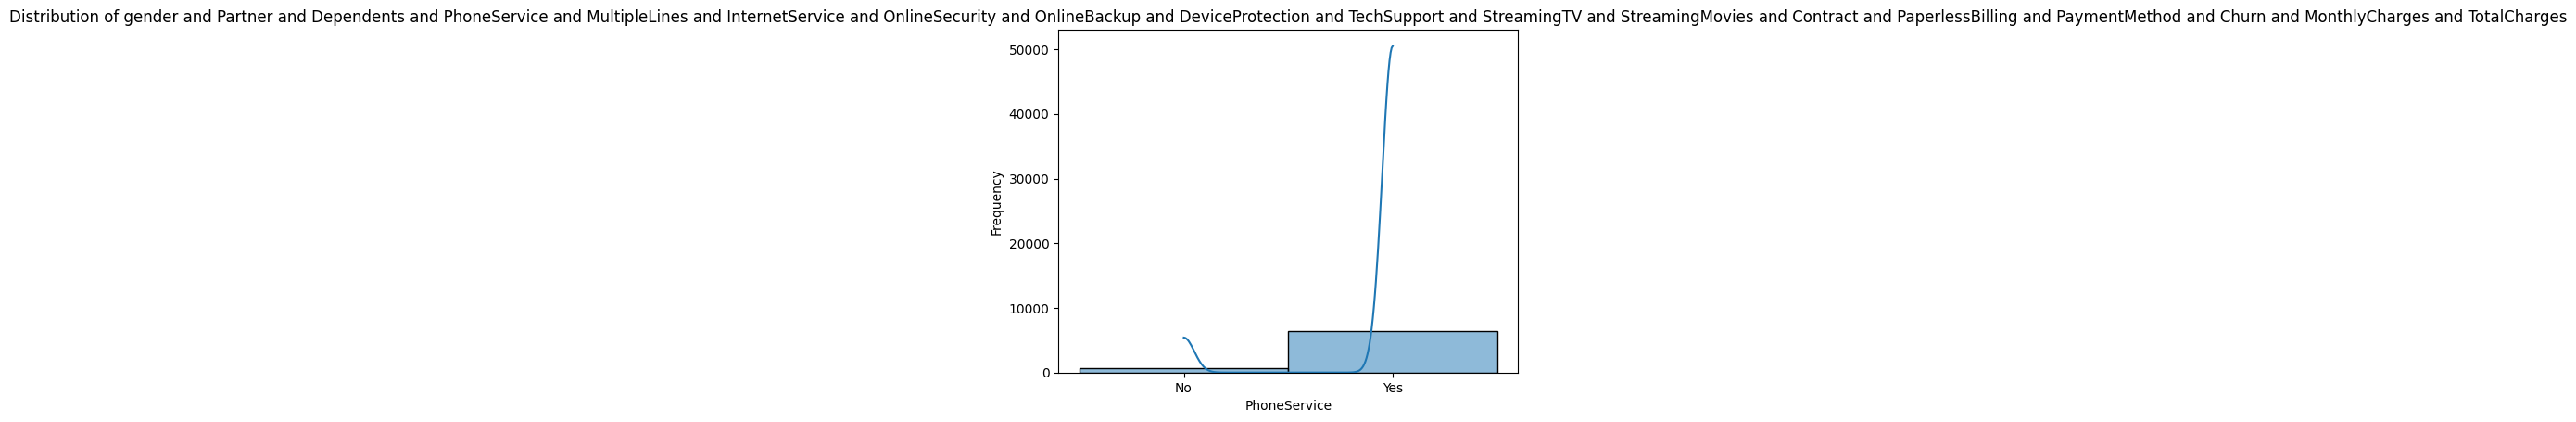

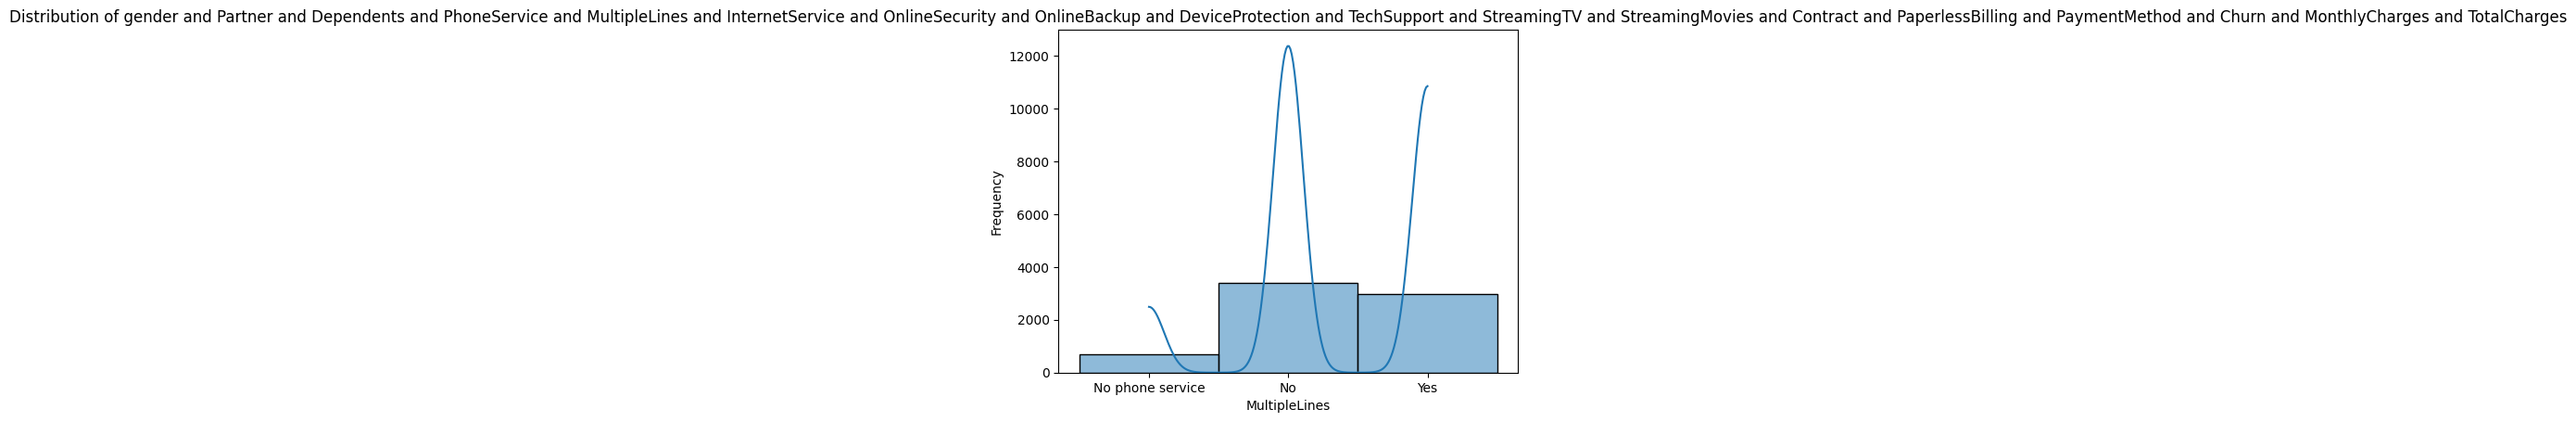

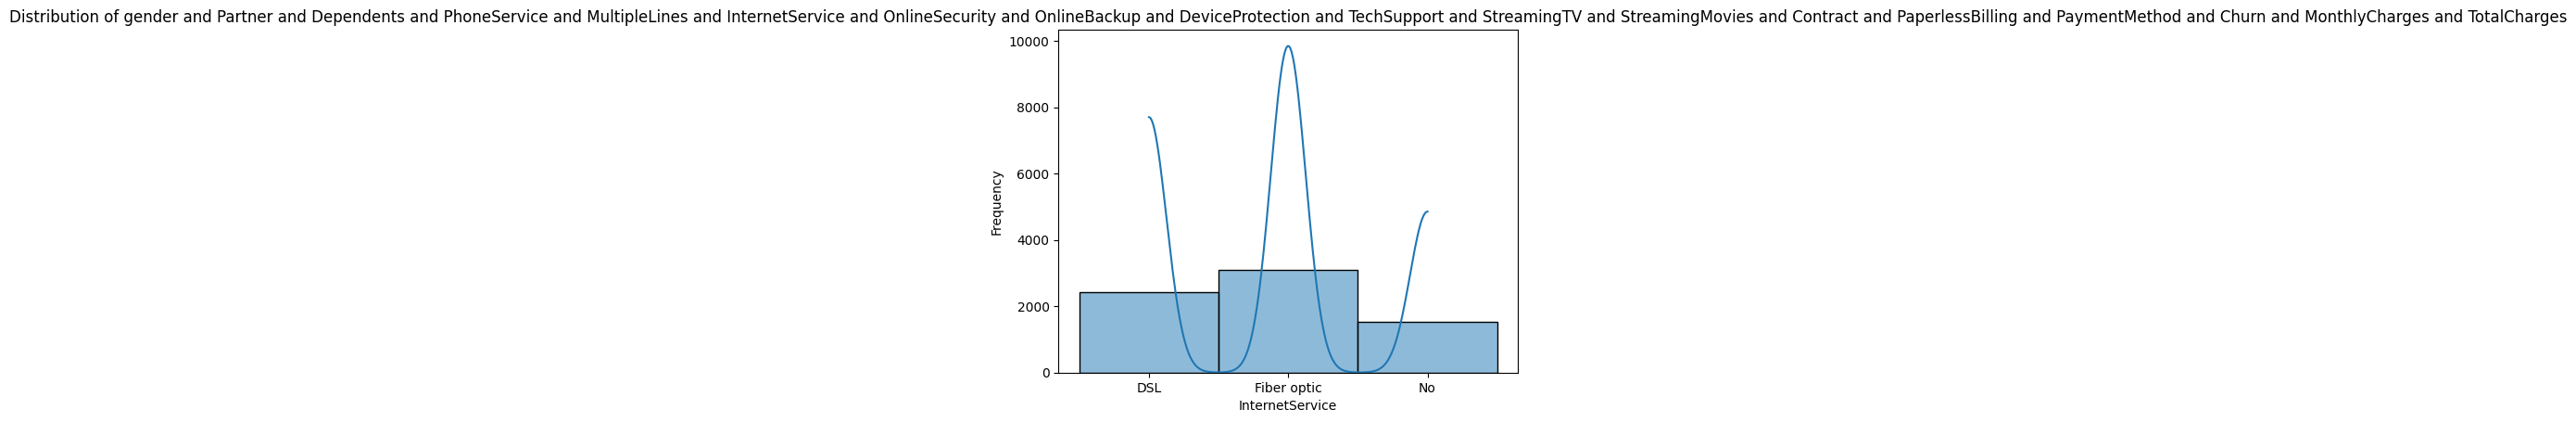

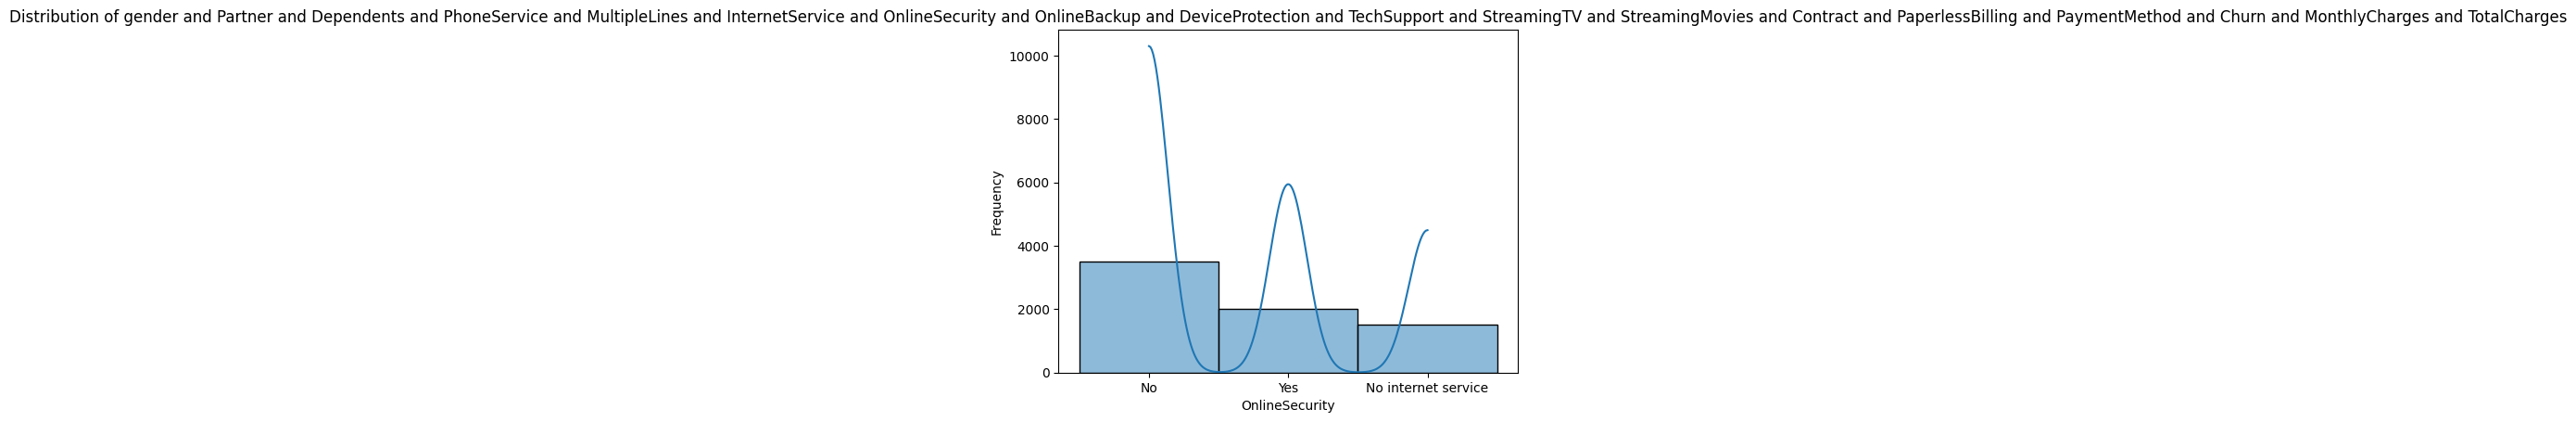

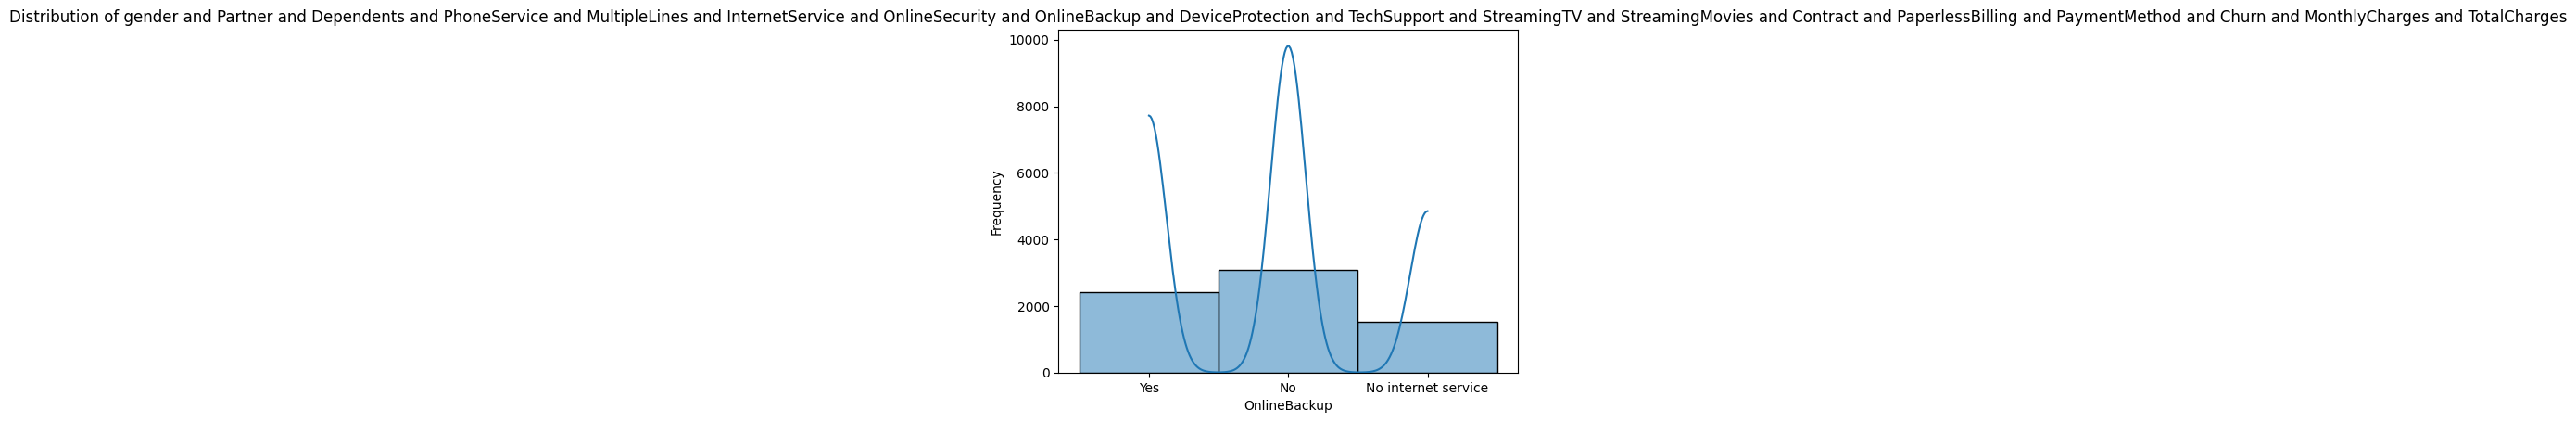

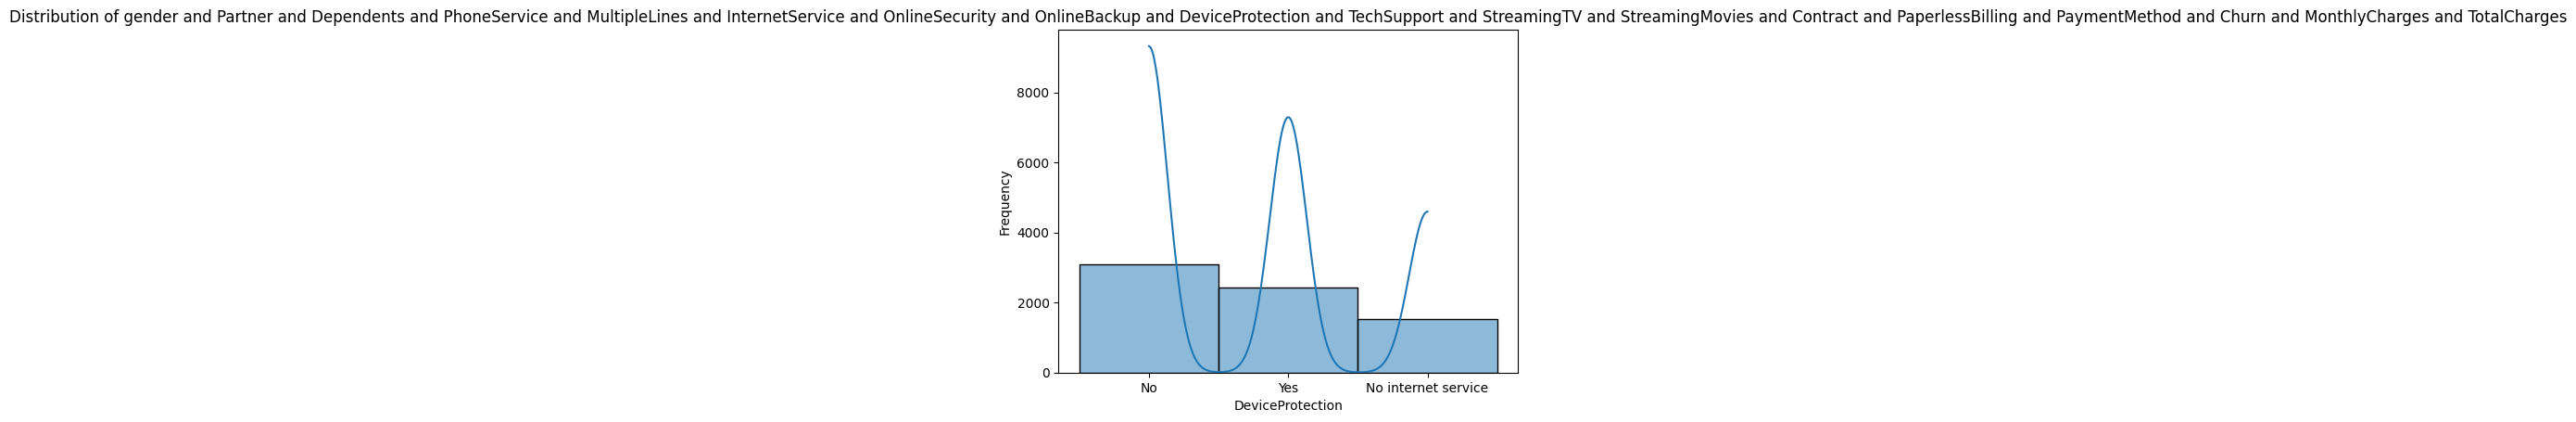

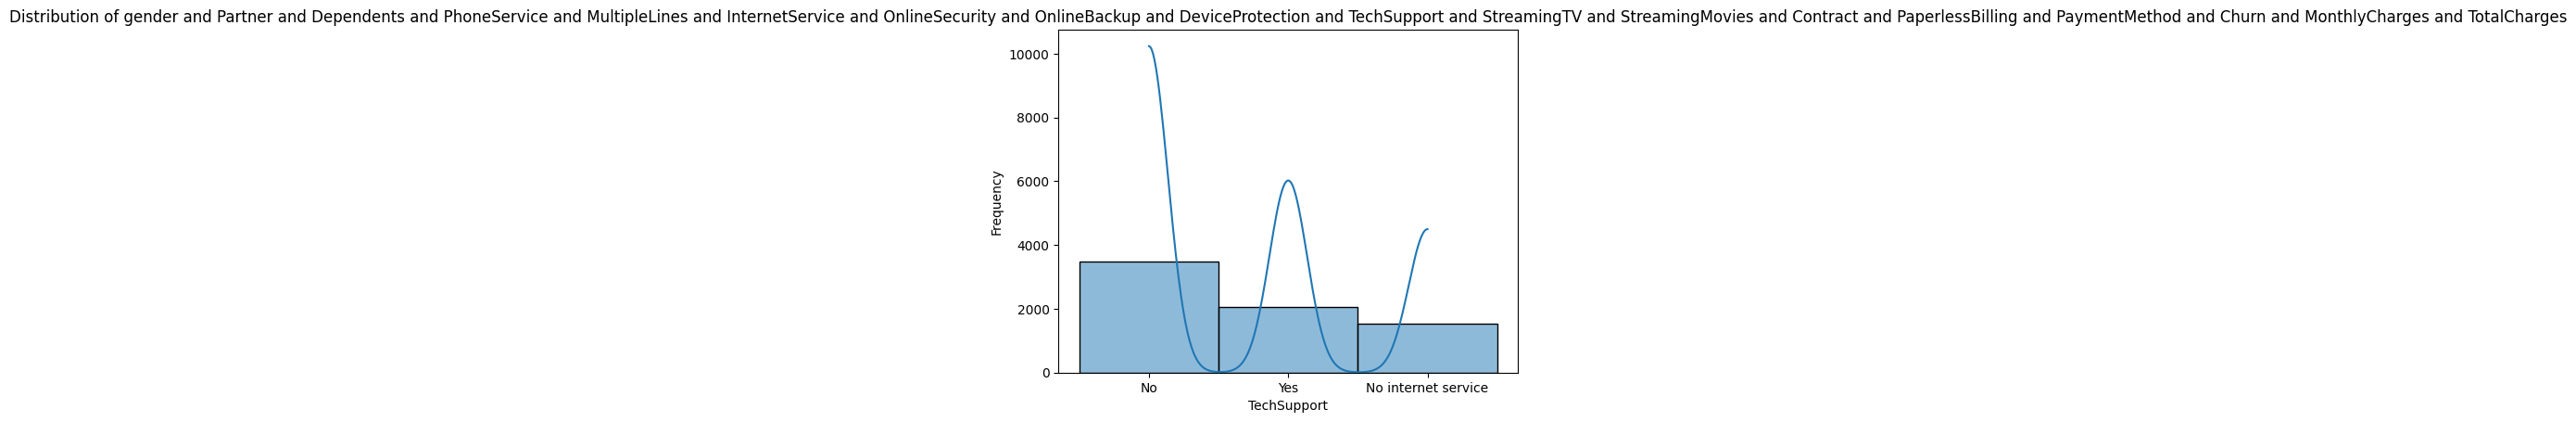

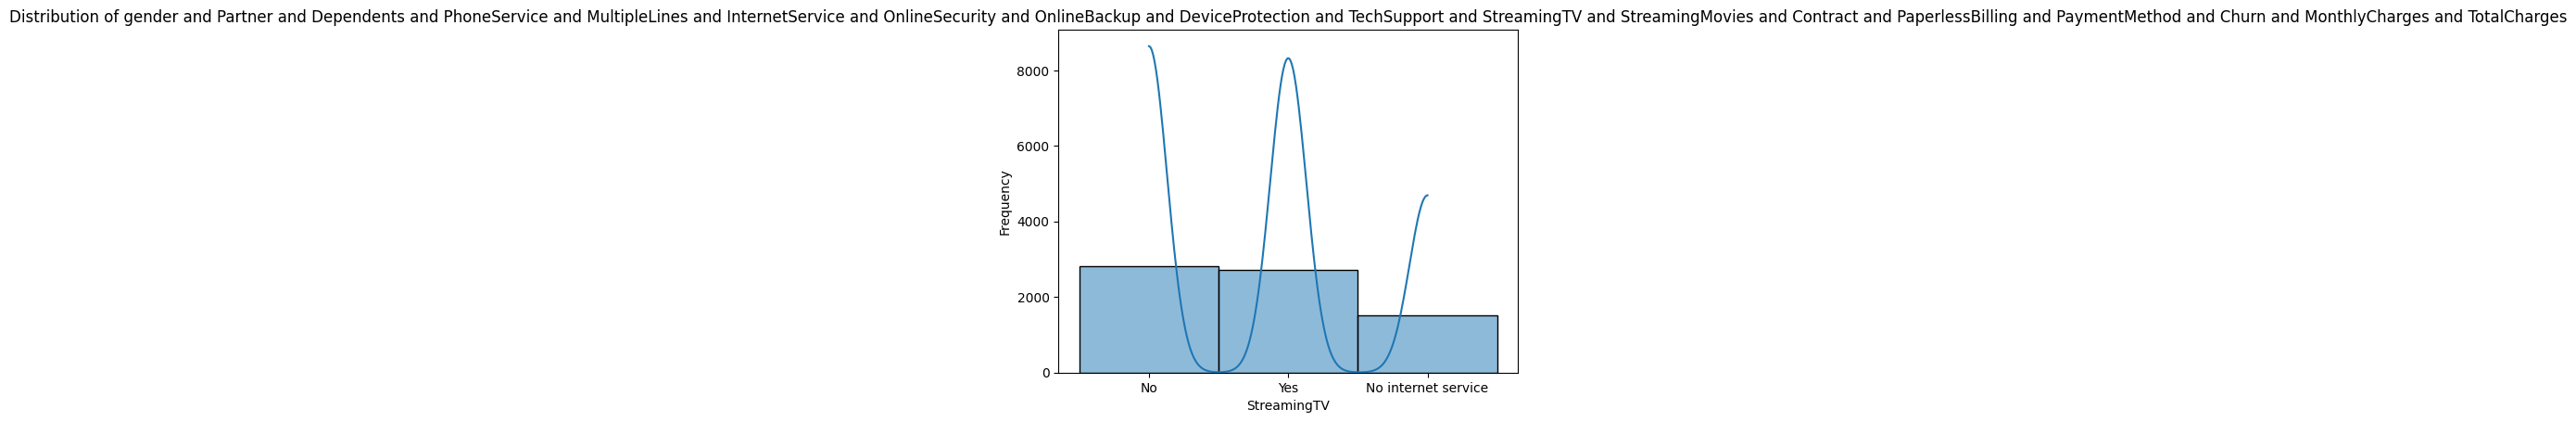

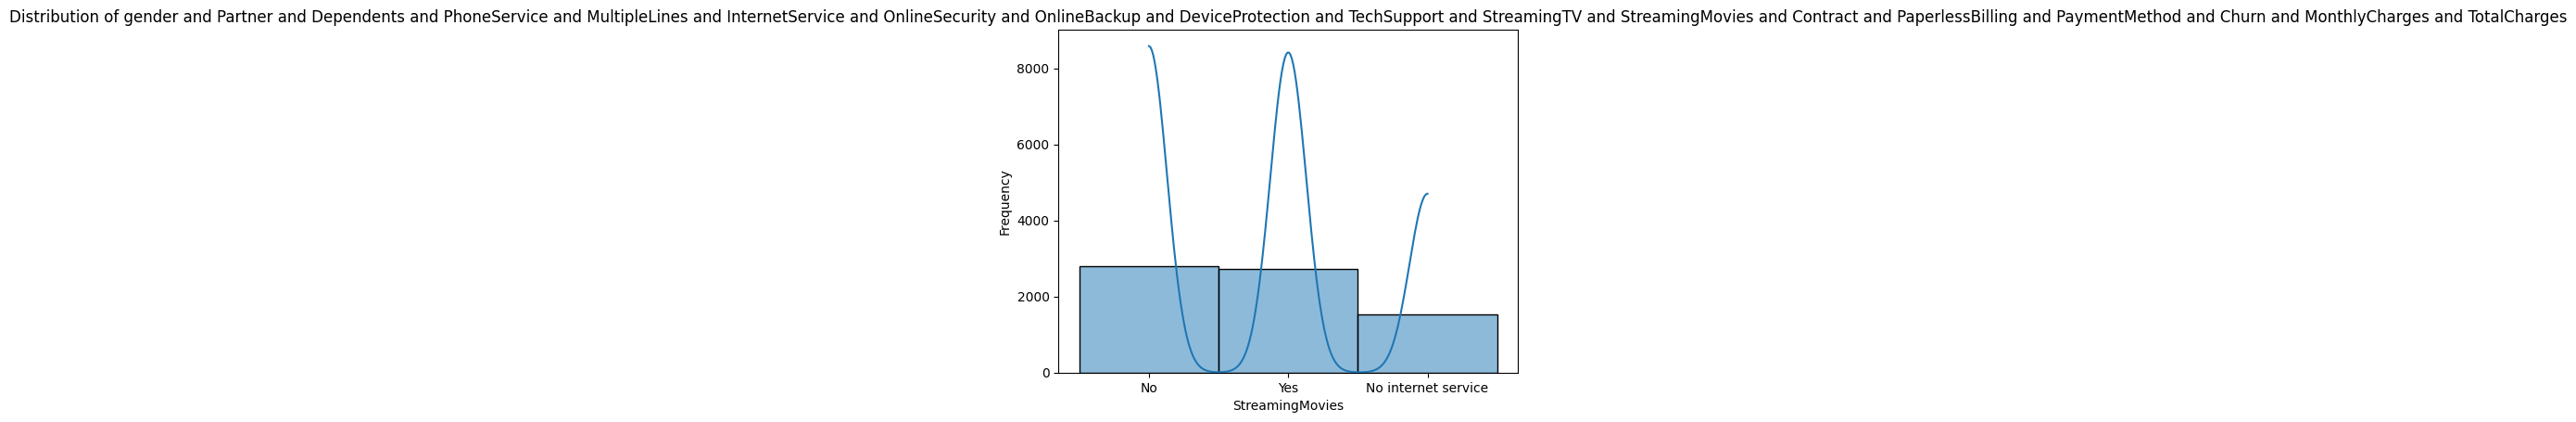

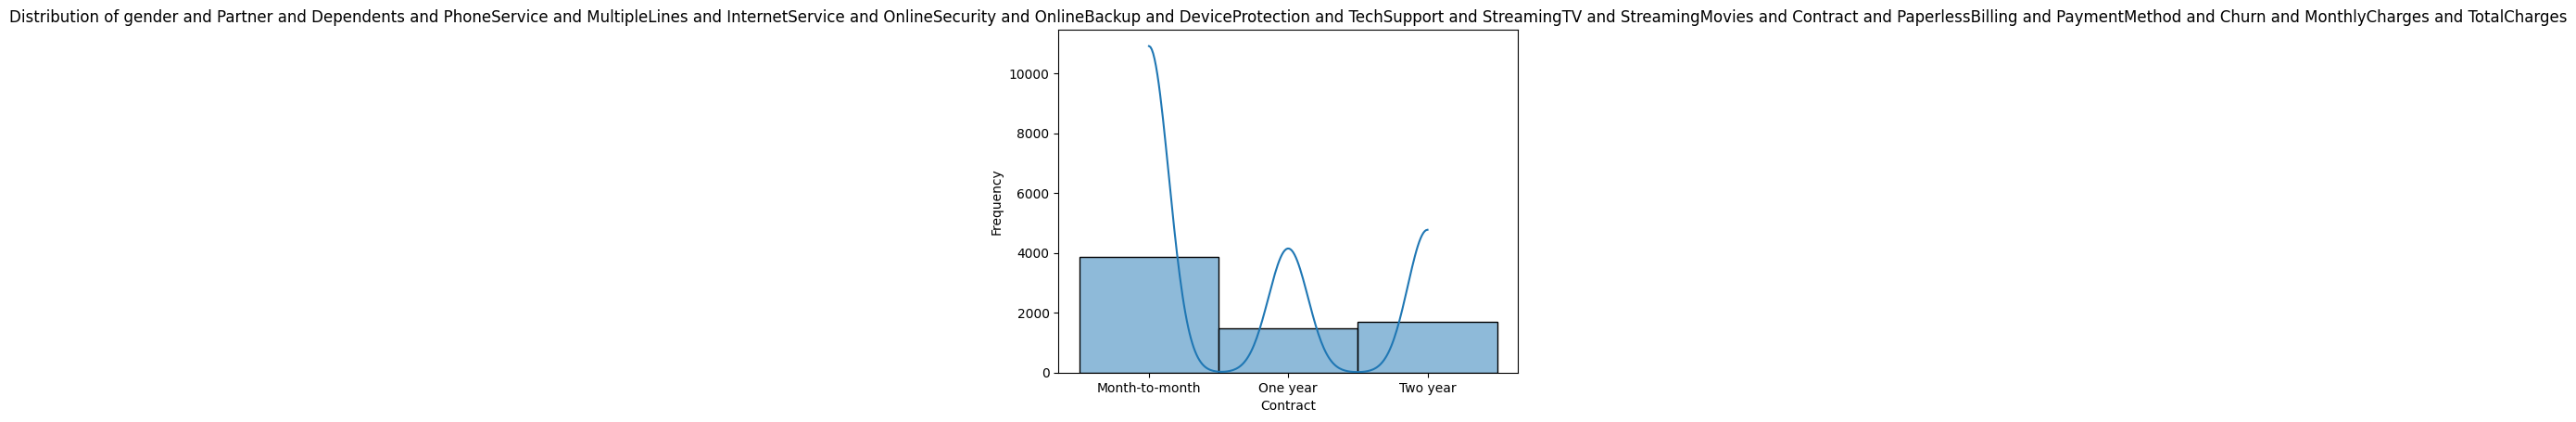

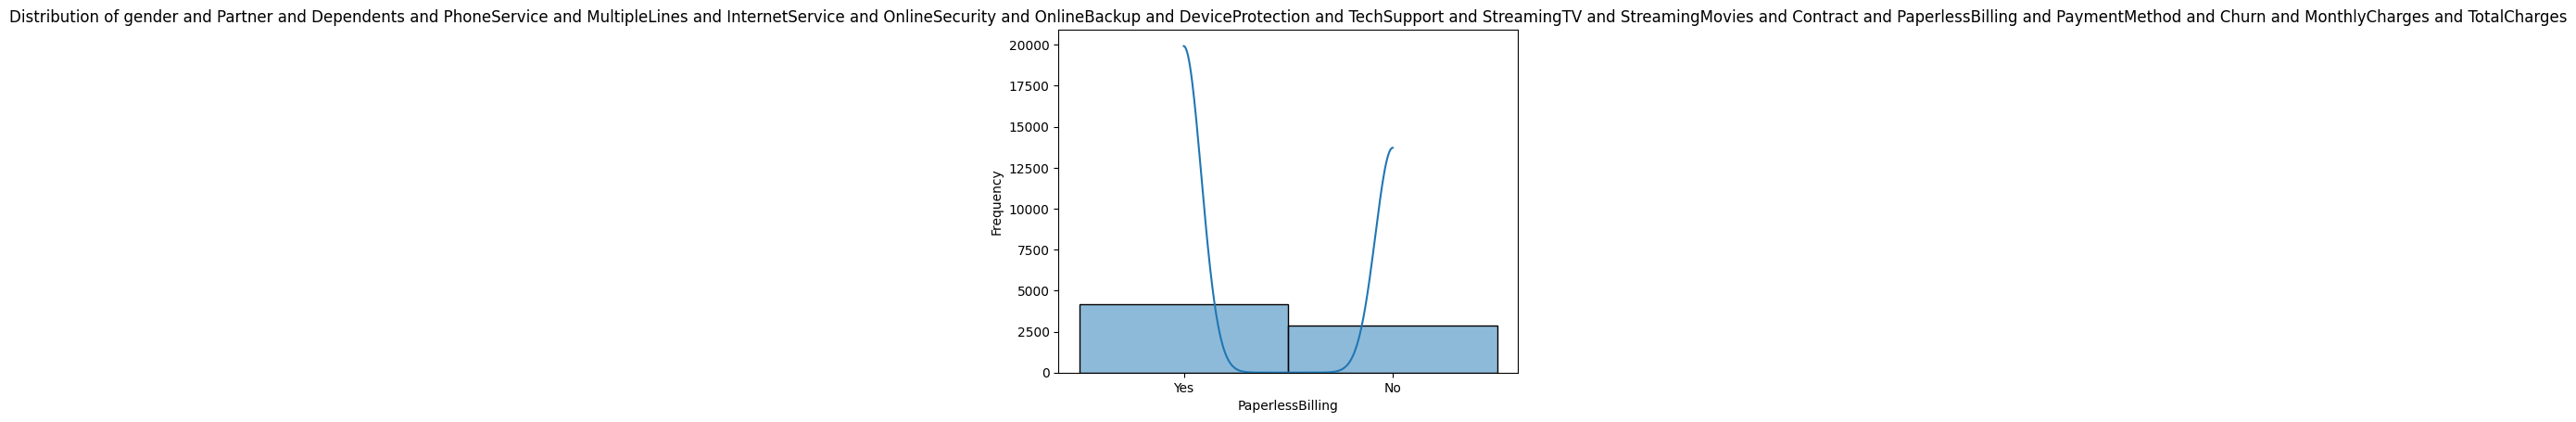

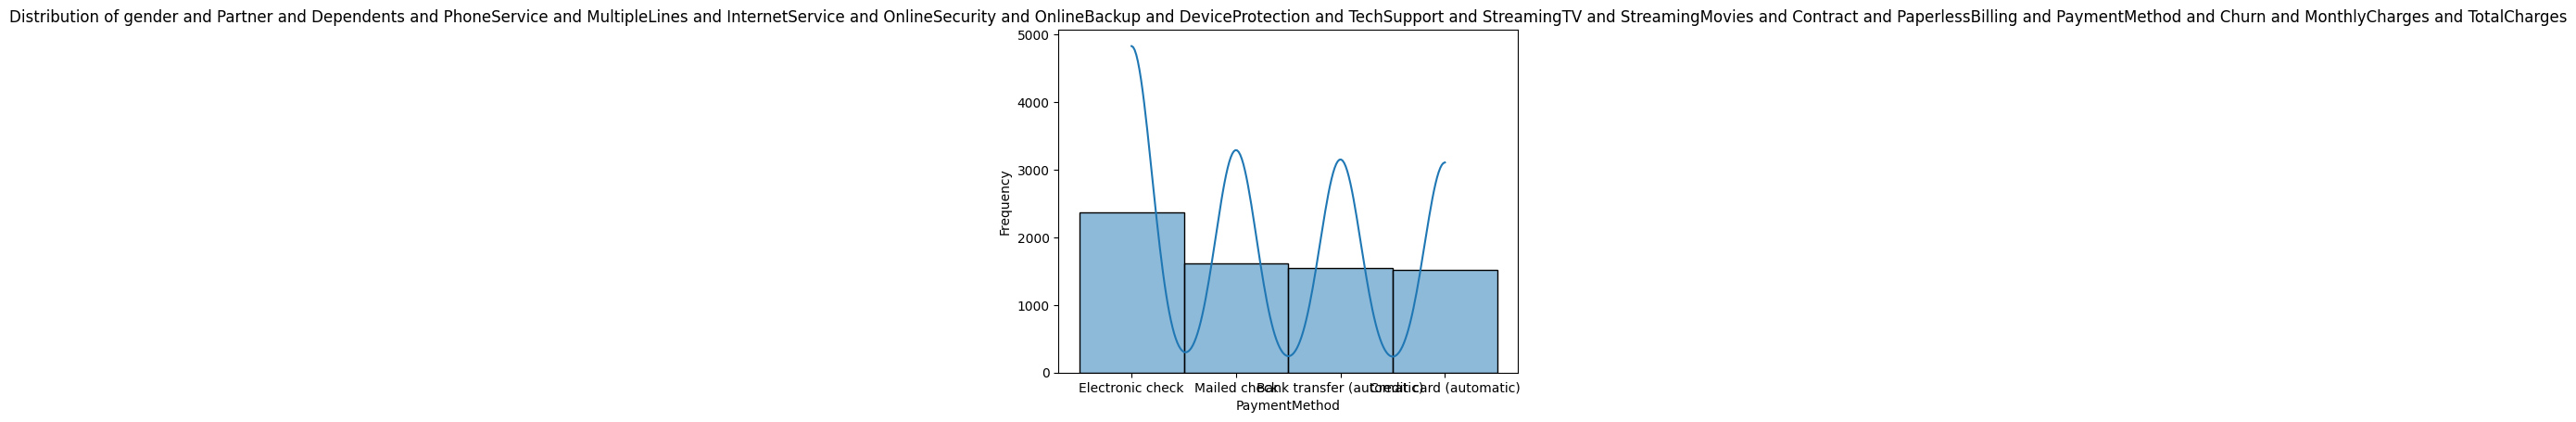

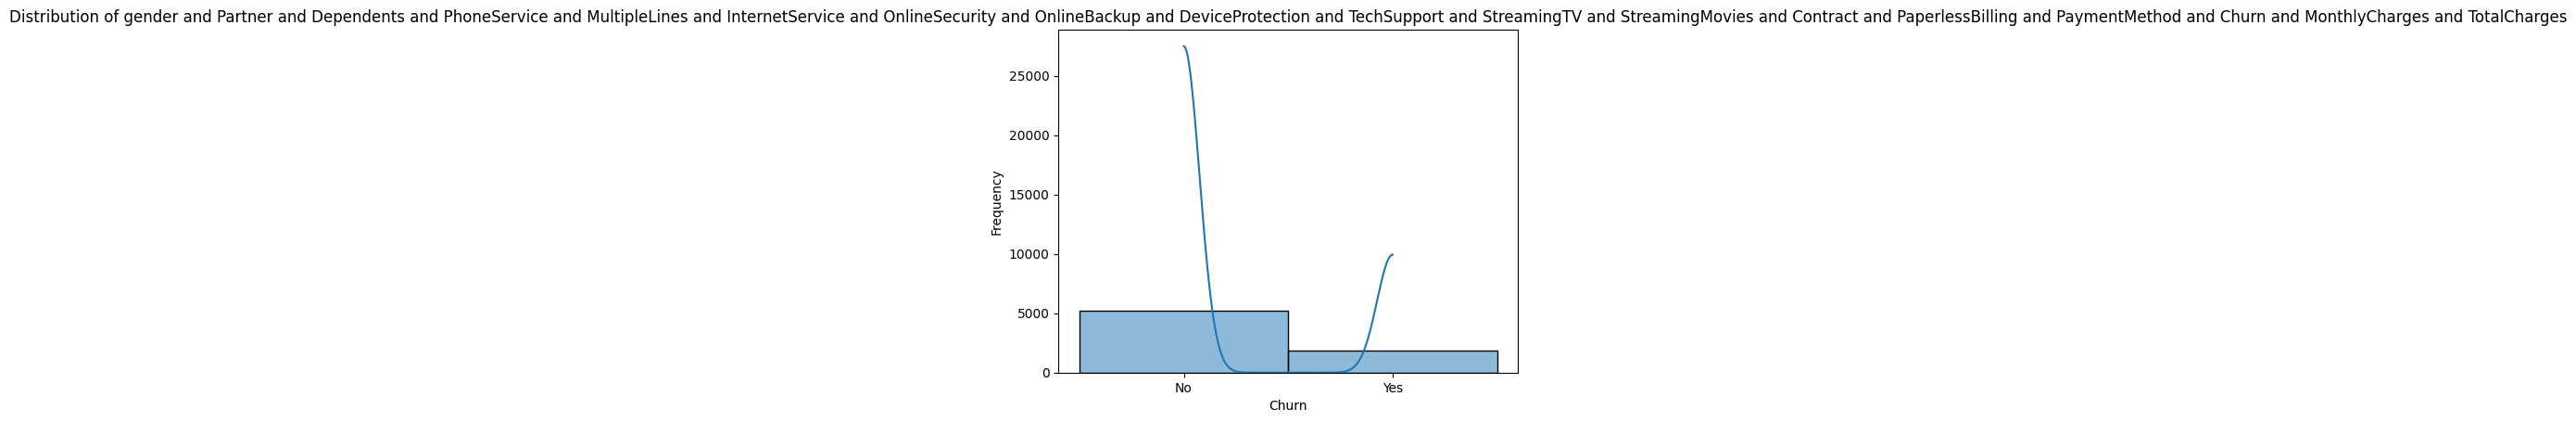

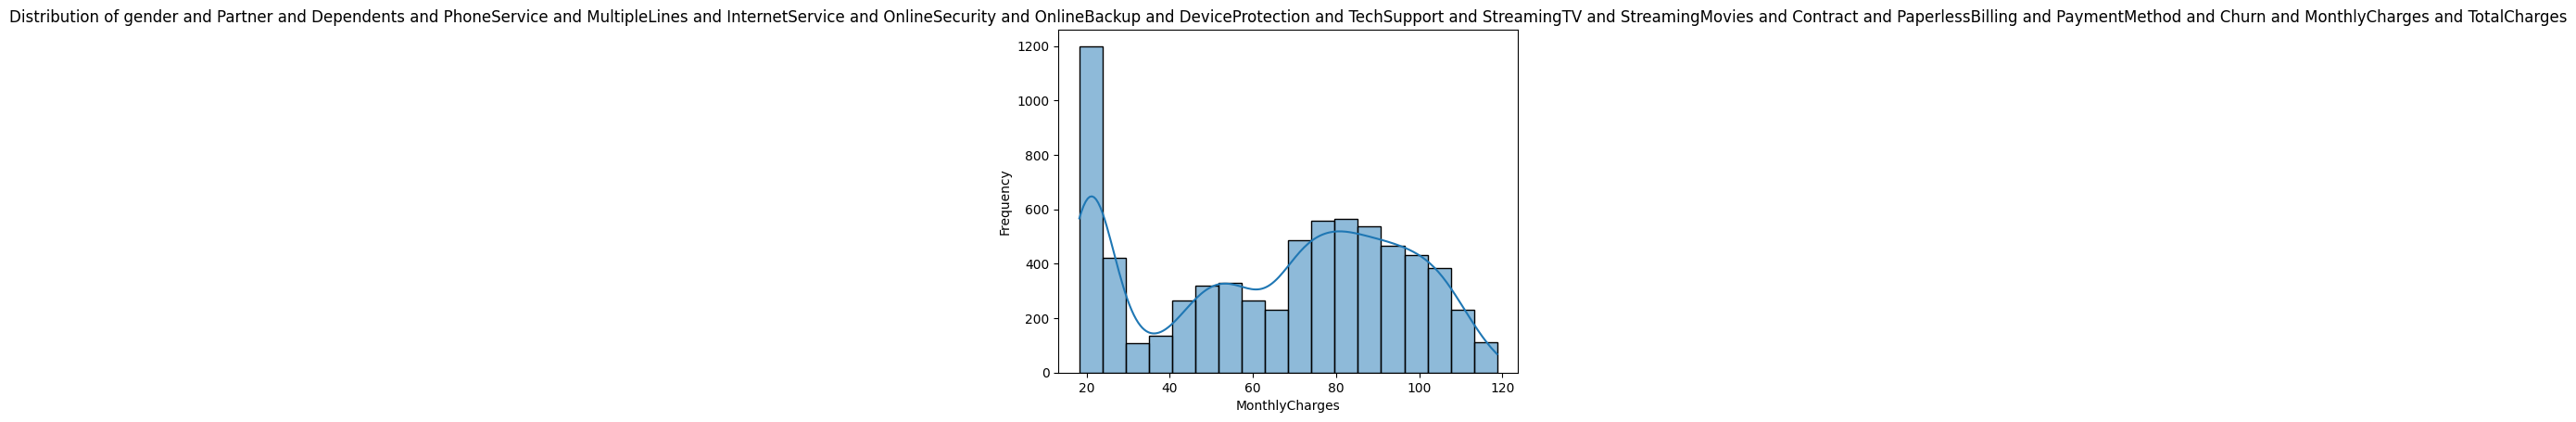

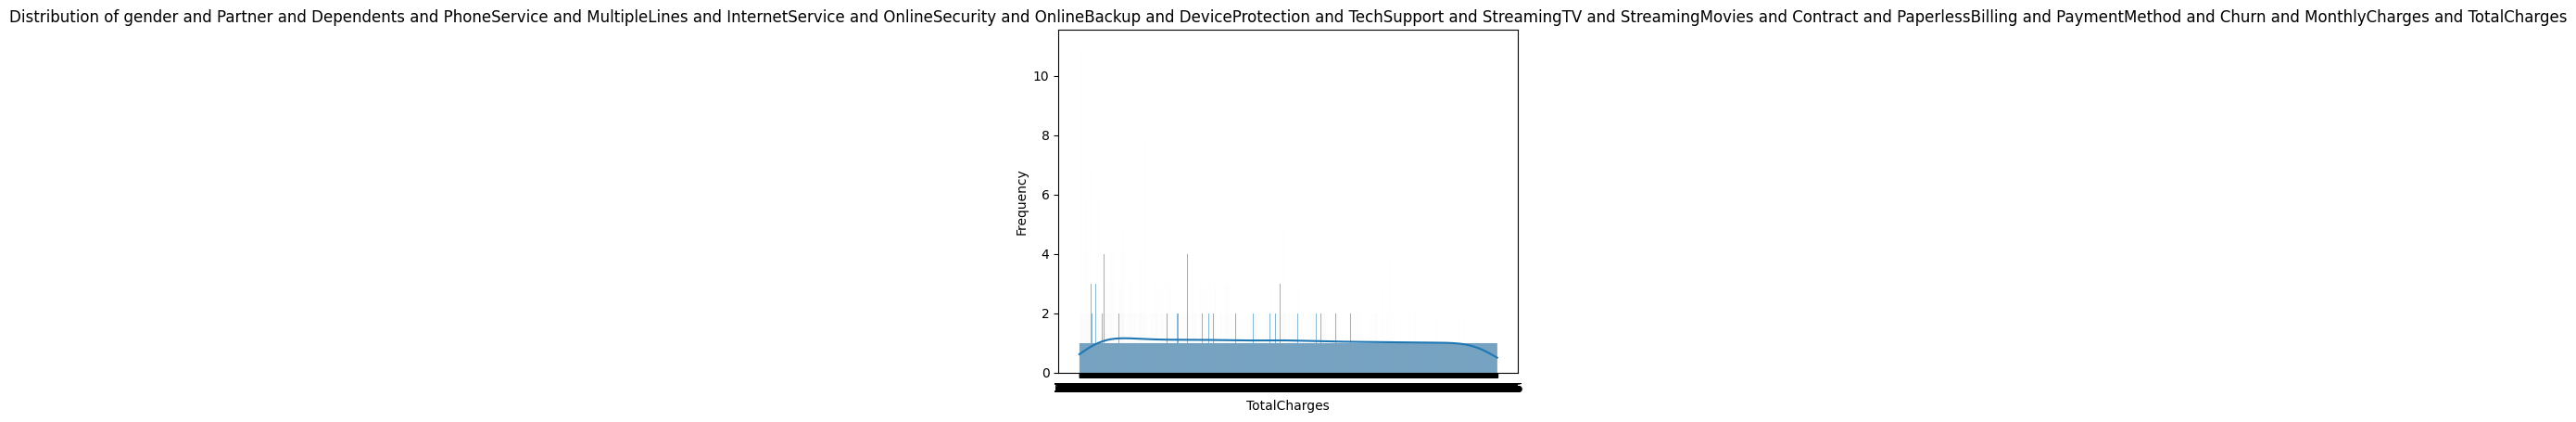

In [7]:
def plot_distribution(data, column_names):
    for column_name in column_names:
        fig, ax = plt.subplots()
        sns.histplot(data[column_name], ax=ax, kde=True)
        ax.set_xlabel(column_name)
        ax.set_ylabel('Frequency')
        ax.set_title('Distribution of ' + ' and '.join(column_names))
        plt.show()

plot_distribution(data, ['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies','Contract',  'PaperlessBilling', 'PaymentMethod','Churn','MonthlyCharges'	,'TotalCharges' ])




> We also need to check for the classes(**TargetColumn**):



No     5174
Yes    1869
Name: Churn, dtype: int64


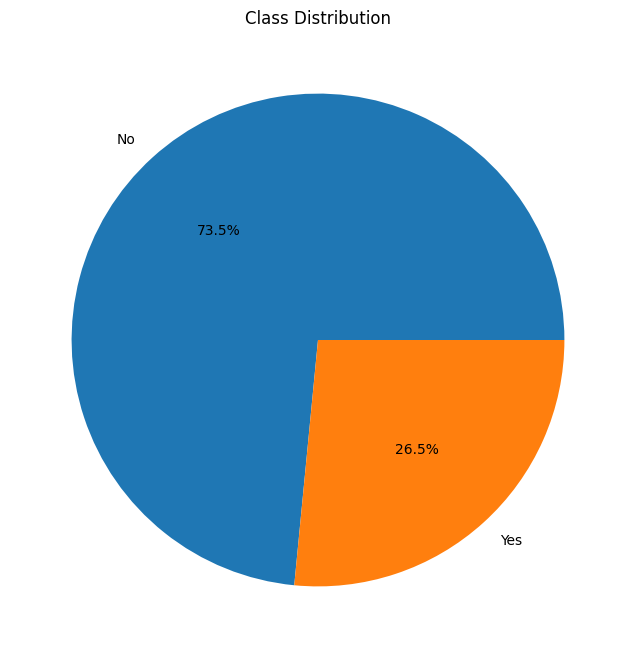

In [8]:
classes = data.iloc[:,-1]


# Assuming your data has a column named 'label' representing the class or category
class_counts = classes.value_counts()

# Print the class distribution
print(class_counts)

#

# Plot the class distribution
plt.figure(figsize=(10, 8))
class_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Distribution')
plt.ylabel('')
plt.show()



#### Statistical Analysis:

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Label Encoding for categorical columns:

In [10]:
columns_to_encode = ['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies','Contract',  'PaperlessBilling', 'PaymentMethod','Churn' ]

# Apply label encoding to selected columns
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

#### Correlation Matrix:

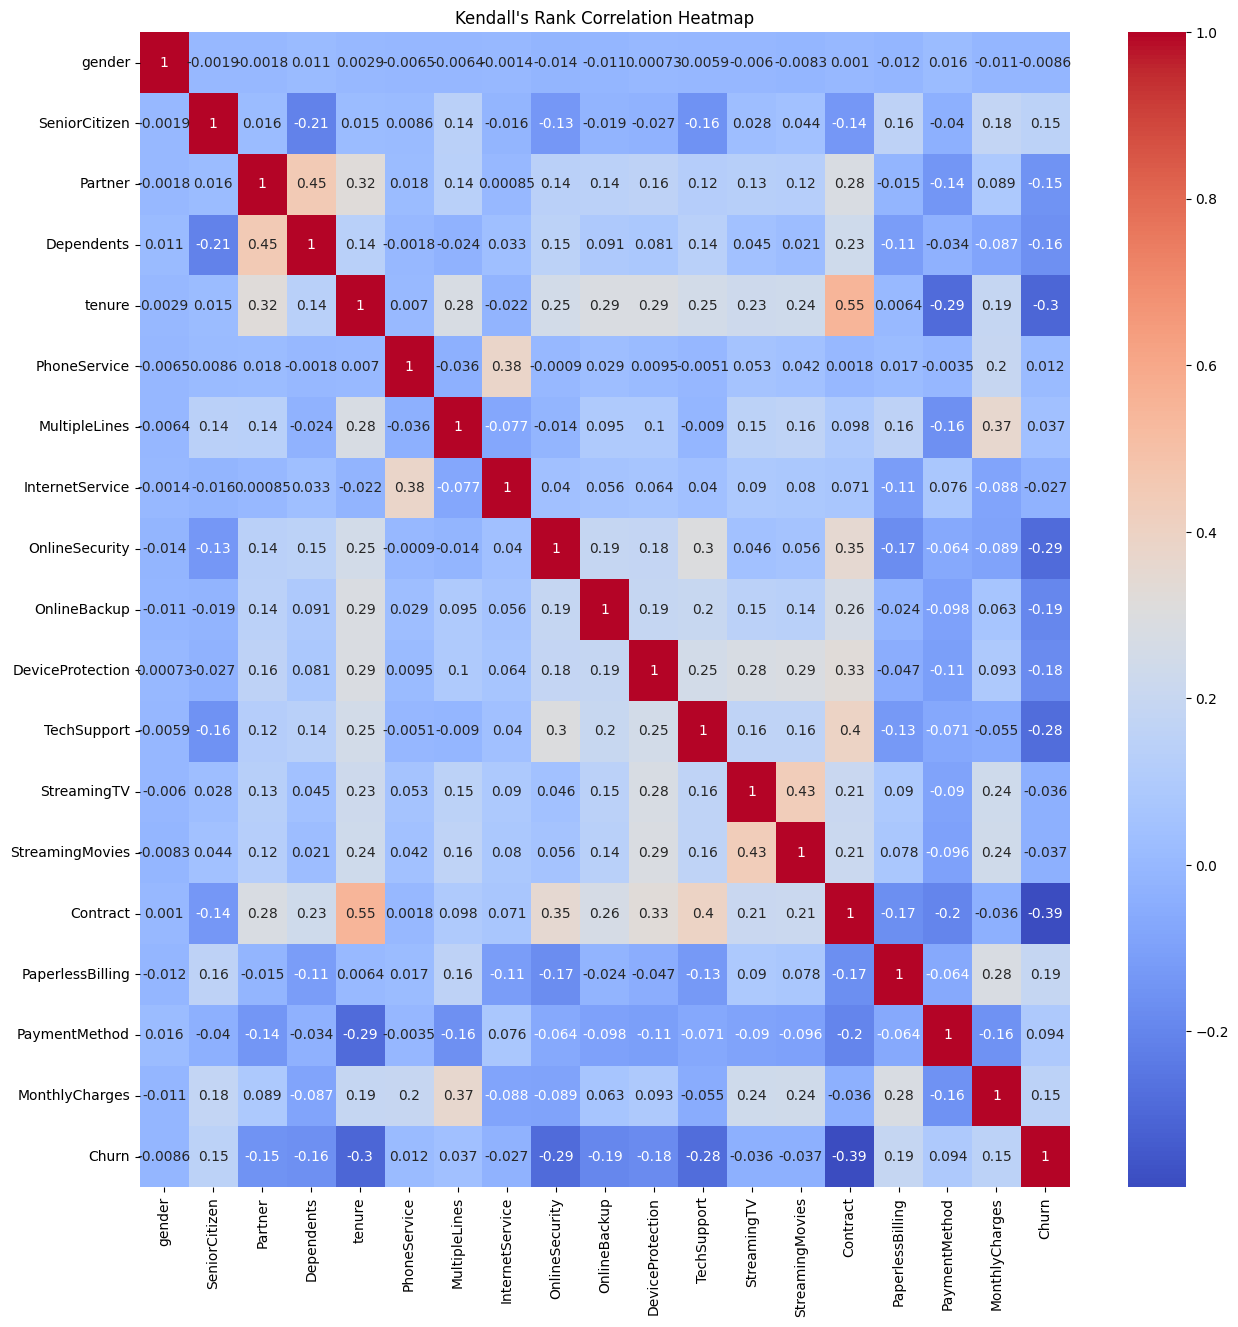

In [11]:

# select only the numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
corr_data = data[numerical_columns]

# calculate Kendall's rank correlation coefficient and p-value for each pair of columns
corr_values = corr_data.corr(method='kendall')
corr_values_rounded = np.round(corr_values, decimals=2)

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_values, cmap='coolwarm', annot=True, ax=ax)

# set the plot title
ax.set_title("Kendall's Rank Correlation Heatmap")

# display the plot
plt.show()



> Let us check if the columns have been changed or not:



In [12]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1




### Now we need to check for missing values:



In [13]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Feature Selection:
 It's really important to check for the features that we want to include in our model building:

Names of important features:  Index(['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges'],
      dtype='object')


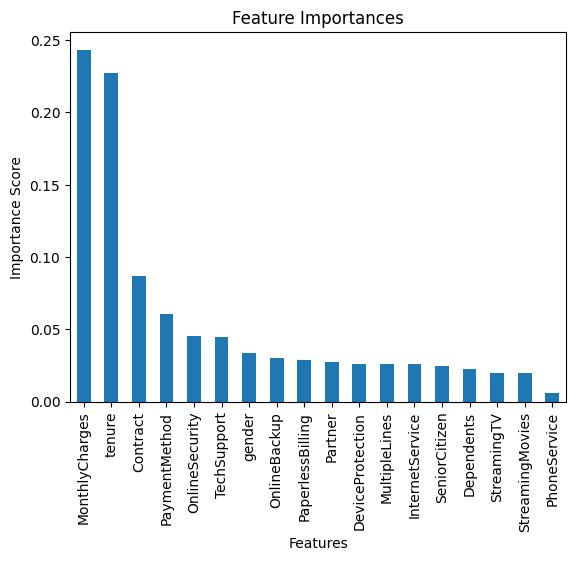

In [14]:
# Create a random forest regressor
rf =  RandomForestClassifier()

X = data.iloc[:, :18]
y = data.iloc[:,-1]

# Fit the regressor to the data
rf.fit(X, y)

# Select the important features
sfm = SelectKBest(k=10)
X_important = sfm.fit_transform(X, y)

# Get the names of the important features
important_feature_names = X.columns[sfm.get_support()]

# Print the names of the important features
print("Names of important features: ", important_feature_names)

# Plot feature importances
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


In [15]:
column_names = ['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'MonthlyCharges','gender','PaymentMethod','InternetService','PhoneService','Contract','StreamingTV','StreamingMovies']
X = data[column_names]
X.head()

,SeniorCitizen,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,gender,PaymentMethod,InternetService,PhoneService,Contract,StreamingTV,StreamingMovies
0,0,0,1,0,2,0,0,1,29.85,0,2,0,0,0,0,0
1,0,0,34,2,0,2,0,0,56.95,1,3,0,1,1,0,0
2,0,0,2,2,2,0,0,1,53.85,1,3,0,1,0,0,0
3,0,0,45,2,0,2,2,0,42.30,1,0,0,0,1,0,0
4,0,0,2,0,0,0,0,1,70.70,0,2,1,1,0,0,0




> Check for empty values



In [16]:
X.isna().sum()

SeniorCitizen       0
Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
PaperlessBilling    0
MonthlyCharges      0
gender              0
PaymentMethod       0
InternetService     0
PhoneService        0
Contract            0
StreamingTV         0
StreamingMovies     0
dtype: int64

There is no NaN values.

### Model Building:
This stage begins by *Splitting the data into training testing and validation* then we will start our model building:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ## This means that the training set is 70% of the data.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.35, random_state=1)
train_set_size = X_train.shape[0]
print("Training set size:", train_set_size)


Training set size: 3204


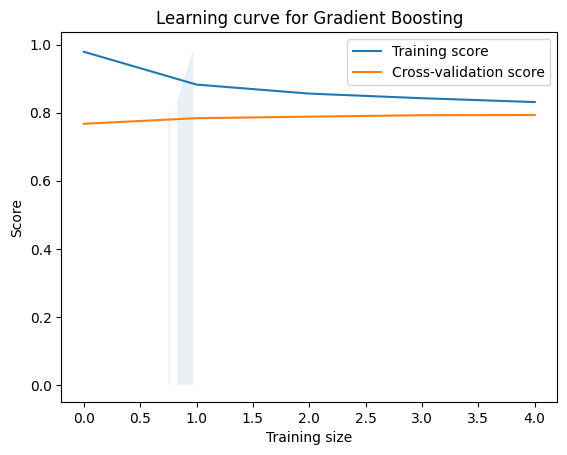

Train score for 'Gradient Boosting': 0.8283395755305868
Test score for 'Gradient Boosting': 0.8135352579271179
Cross validation score for 'Gradient Boosting':0.7971294851794072



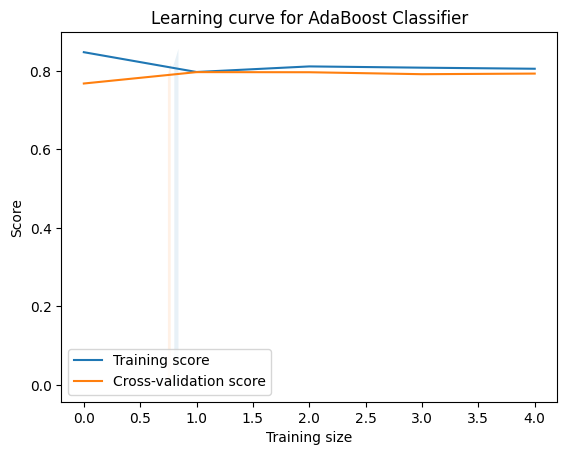

Train score for 'AdaBoost Classifier': 0.8055555555555556
Test score for 'AdaBoost Classifier': 0.8059630856601988
Cross validation score for 'AdaBoost Classifier':0.7949439352574104



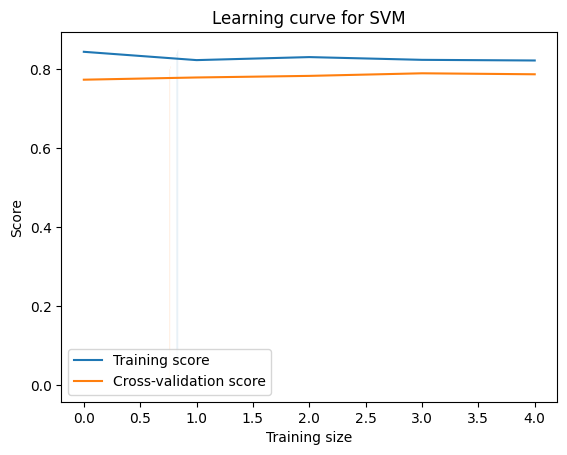

Train score for 'SVM': 0.8217852684144819
Test score for 'SVM': 0.8054898248935163
Cross validation score for 'SVM':0.7858926482059283



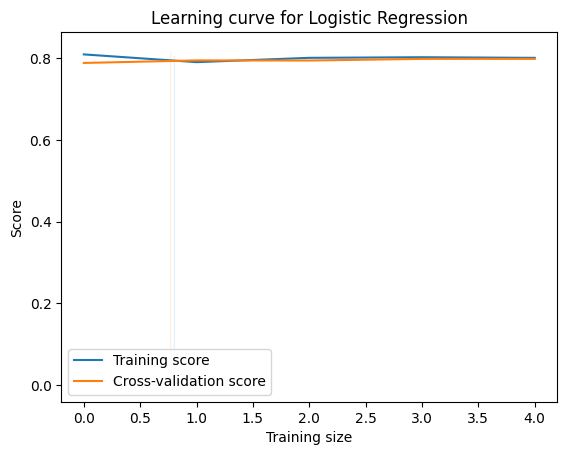

Train score for 'Logistic Regression': 0.7999375780274657
Test score for 'Logistic Regression': 0.8054898248935163
Cross validation score for 'Logistic Regression':0.7971294851794072



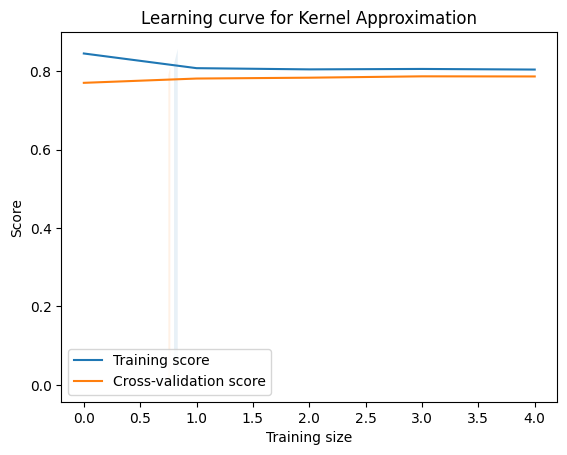

Train score for 'Kernel Approximation': 0.8036828963795256
Test score for 'Kernel Approximation': 0.8017037387600567
Cross validation score for 'Kernel Approximation':0.787455635725429



In [18]:
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost Classifier":  AdaBoostClassifier(),
     "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Kernel Approximation": Pipeline([
        ("feature_map", Nystroem()),
        ("svm", LinearSVC())
    ]),


}

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


train_scores = {}
test_scores = {}
cv_scores = {}

for name, model in models.items():
    # Fit with train data
    c = model.fit(X_train, y_train)
    train_score = c.score(X_train, y_train)
    test_score = c.score(X_test, y_test)
    cv_score = np.mean(cross_val_score(c, X_train, y_train))

    # Store the scores in dictionaries
    train_scores[name] = [train_score]
    test_scores[name] = [test_score]
    cv_scores[name] = [cv_score]

    # Get the learning curve data
    train_sizes, train_scores_data, test_scores_data = learning_curve(model, X_train, y_train, cv=10, n_jobs=-1)

    # Calculate the mean and standard deviation of the training scores
    train_scores_mean = np.mean(train_scores_data, axis=1)
    train_scores_std = np.std(train_scores_data, axis=1)

    # Calculate the mean and standard deviation of the test scores
    test_scores_mean = np.mean(test_scores_data, axis=1)
    test_scores_std = np.std(test_scores_data, axis=1)

    # Store the learning curve data in dictionaries
    train_scores[name].extend(train_scores_mean.tolist())
    test_scores[name].extend(test_scores_mean.tolist())

    # Plot the learning curve
    plt.plot( train_scores_mean, label="Training score")
    plt.fill_between( train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
    plt.plot( test_scores_mean, label="Cross-validation score")
    plt.fill_between( test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
    plt.xlabel("Training size")
    plt.ylabel("Score")
    plt.title("Learning curve for %s" % name)
    plt.legend()
    plt.show()
    # Store the learning curve data in dictionaries
    cv_scores[name].extend([np.mean(cross_val_score(c, X_train, y_train, cv=10)) ])

    # Validate scores
    print("Train score for '%s': %s" % (name, str(train_score)))
    print("Test score for '%s': %s" % (name, str(test_score)))
    print("Cross validation score for '%s':%s" % (name, str(cv_score)))
    print("")


> As the results above shows, It's not that good accuracy due to the small amount of the training set!



### Accuracy Increament:
> This could happen by increasing the amount of the training set. However, all the set is significantly small. So the best solution will be a technique called     ***Data Augmentation***

In [19]:
## Data shape before augmentation:
data.shape

(7043, 20)

In [20]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [21]:
import numpy as np
import pandas as pd

def generate_virtual_samples(data, augmentation_factor):


  num_samples = len(data)
  num_features = data.shape[1]
  augmented_data = []

  for i in range(num_samples):
    original_sample = data.iloc[i]
    augmented_samples = [original_sample.copy()]  # Copy to avoid modifying original data

    for _ in range(augmentation_factor):
      augmented_sample = original_sample.copy()

      # Apply noise augmentation to numerical features (excluding Churn)
      for feature in range(num_features):
        if pd.api.types.is_numeric_dtype(data.iloc[:, feature]) and feature != 'Churn':  # Check if numerical and not Churn
          noise = np.random.normal(0, 0.1)  # Random noise with mean 0, std dev 0.1
          augmented_sample.iloc[feature] += noise

      # Apply label flipping (optional) with a probability
      flip_probability = 0.1  # Adjust probability as needed
      if np.random.rand() < flip_probability:
        # Randomly flip the Churn label (consider class distribution)
        if augmented_sample['Churn'] == 0:
          augmented_sample['Churn'] = 1
        else:
          augmented_sample['Churn'] = 0

      augmented_samples.append(augmented_sample)

    augmented_data.extend(augmented_samples)

  return pd.DataFrame(augmented_data)

augmentation_factor = 10
augmented_data = generate_virtual_samples(data, augmentation_factor)

# Save augmented data (optional)
augmented_data.to_csv("augmented_data.csv", index=False)


In [22]:
df = pd.read_csv('/content/augmented_data.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,29.850000,29.85,0.000000
1,0.030313,-0.031508,0.832019,0.158047,0.886714,-0.122743,0.743502,-0.119483,-0.028531,2.025568,-0.064990,-0.131427,-0.096451,0.142477,0.069412,0.992485,2.140764,29.908193,29.85,0.088450
2,-0.073979,0.041401,0.984128,0.035348,0.934136,-0.090591,1.191623,-0.047853,0.035797,2.045201,0.032570,0.047538,-0.062766,-0.029864,-0.011823,1.013566,1.909694,29.839627,29.85,0.000000
3,0.019410,0.120170,0.957977,-0.067663,1.033864,-0.054824,0.993280,-0.177771,-0.107653,2.005654,0.083770,0.137735,0.070727,-0.070175,-0.085556,0.967362,2.024282,29.832648,29.85,-0.006942
4,0.029000,-0.021781,0.953953,0.094815,0.936976,0.011518,0.962008,-0.108159,0.115132,2.124749,-0.054068,0.009339,0.129806,0.051121,-0.163857,0.913423,1.929782,29.790152,29.85,0.119554


In [23]:
df['Churn'].unique()

array([ 0.        ,  0.08844956, -0.00694172, ..., -0.14449059,
       -0.21236594, -0.03458254])

In [24]:
def to_binary_labels(df, churn_col, threshold):
  """Converts churn probability (continuous) to binary labels (0 or 1) using a threshold."""
  df[churn_col ] = np.where(df[churn_col] > threshold, 1, 0)
  return df

# Assuming 'df' is your DataFrame and 'Churn_Probability' is the column with churn probability
df = to_binary_labels(df.copy(), 'Churn', 0.5)  # Adjust threshold and column name
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,29.850000,29.85,0
1,0.030313,-0.031508,0.832019,0.158047,0.886714,-0.122743,0.743502,-0.119483,-0.028531,2.025568,-0.064990,-0.131427,-0.096451,0.142477,0.069412,0.992485,2.140764,29.908193,29.85,0
2,-0.073979,0.041401,0.984128,0.035348,0.934136,-0.090591,1.191623,-0.047853,0.035797,2.045201,0.032570,0.047538,-0.062766,-0.029864,-0.011823,1.013566,1.909694,29.839627,29.85,0
3,0.019410,0.120170,0.957977,-0.067663,1.033864,-0.054824,0.993280,-0.177771,-0.107653,2.005654,0.083770,0.137735,0.070727,-0.070175,-0.085556,0.967362,2.024282,29.832648,29.85,0
4,0.029000,-0.021781,0.953953,0.094815,0.936976,0.011518,0.962008,-0.108159,0.115132,2.124749,-0.054068,0.009339,0.129806,0.051121,-0.163857,0.913423,1.929782,29.790152,29.85,0


In [25]:
df['Churn'].unique()

array([0, 1])

In [26]:
#   Augmented data shape:
df.shape

(77473, 20)

> WOW! we can see the difference of the number of the samples here!

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77473 entries, 0 to 77472
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            77473 non-null  float64
 1   SeniorCitizen     77473 non-null  float64
 2   Partner           77473 non-null  float64
 3   Dependents        77473 non-null  float64
 4   tenure            77473 non-null  float64
 5   PhoneService      77473 non-null  float64
 6   MultipleLines     77473 non-null  float64
 7   InternetService   77473 non-null  float64
 8   OnlineSecurity    77473 non-null  float64
 9   OnlineBackup      77473 non-null  float64
 10  DeviceProtection  77473 non-null  float64
 11  TechSupport       77473 non-null  float64
 12  StreamingTV       77473 non-null  float64
 13  StreamingMovies   77473 non-null  float64
 14  Contract          77473 non-null  float64
 15  PaperlessBilling  77473 non-null  float64
 16  PaymentMethod     77473 non-null  float6

In [28]:
try:
  df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Replace with 'ignore' to skip errors
except pd.errors.ParserError:
  print("Error: Some values in 'TotalCharges' cannot be converted to float.")


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77473 entries, 0 to 77472
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            77473 non-null  float64
 1   SeniorCitizen     77473 non-null  float64
 2   Partner           77473 non-null  float64
 3   Dependents        77473 non-null  float64
 4   tenure            77473 non-null  float64
 5   PhoneService      77473 non-null  float64
 6   MultipleLines     77473 non-null  float64
 7   InternetService   77473 non-null  float64
 8   OnlineSecurity    77473 non-null  float64
 9   OnlineBackup      77473 non-null  float64
 10  DeviceProtection  77473 non-null  float64
 11  TechSupport       77473 non-null  float64
 12  StreamingTV       77473 non-null  float64
 13  StreamingMovies   77473 non-null  float64
 14  Contract          77473 non-null  float64
 15  PaperlessBilling  77473 non-null  float64
 16  PaymentMethod     77473 non-null  float6

In [30]:
df.isna().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        121
Churn                 0
dtype: int64

In [31]:
# Create a SimpleImputer for 'TotalCharges'
imputer = SimpleImputer(strategy="mean")  # Choose your strategy (mean, median, most_frequent)

# Impute missing values in 'TotalCharges'
df["TotalCharges"] = imputer.fit_transform(df[["TotalCharges"]])[:, 0]

In [32]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Names of important features: Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


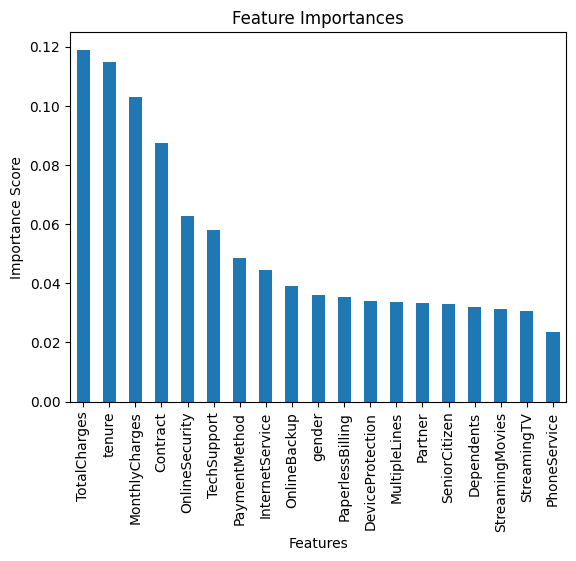

In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last
y = df.iloc[:, -1]

# Create a Random Forest Regressor (suitable for regression)
rf = RandomForestClassifier(n_estimators=100)  # Adjust n_estimators as needed

# Fit the regressor to the data
rf.fit(X, y)

# Feature selection using SelectKBest with f_regression (regression-specific)
sfm = SelectKBest(f_regression, k=10)  # Choose top 10 features (adjust k)
X_important = sfm.fit_transform(X, y)

# Get names of important features
important_feature_names = X.columns[sfm.get_support()]

# Print important feature names
print("Names of important features:", important_feature_names)

# Plot feature importances
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


In [46]:
column_names =['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges']
# Separate features (X) and target variable (y)
X = df[column_names]
y = df.iloc[:, -1]
print(X)

       Dependents     tenure  OnlineSecurity  OnlineBackup  DeviceProtection  \
0        0.000000   1.000000        0.000000      2.000000          0.000000   
1        0.158047   0.886714       -0.028531      2.025568         -0.064990   
2        0.035348   0.934136        0.035797      2.045201          0.032570   
3       -0.067663   1.033864       -0.107653      2.005654          0.083770   
4        0.094815   0.936976        0.115132      2.124749         -0.054068   
...           ...        ...             ...           ...               ...   
77468    0.013877  65.938397        2.023256     -0.039602          2.074258   
77469    0.034672  65.973419        1.791409      0.182908          2.165609   
77470    0.147998  66.156605        1.972028      0.041213          1.944878   
77471   -0.036998  65.930282        2.035265      0.094003          2.066775   
77472   -0.043563  66.025809        1.811283      0.083069          2.151826   

       TechSupport  Contract  Paperless

In [ ]:
classes = df.iloc[:,-1]


# Assuming your data has a column named 'label' representing the class or category
class_counts = classes.value_counts()

# Print the class distribution
print(class_counts)

#

# Plot the class distribution
plt.figure(figsize=(10, 8))
class_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Distribution')
plt.ylabel('')
plt.show()



In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ## This means that the training set is 70% of the data.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.35, random_state=1)
train_set_size = X_train.shape[0]

print(" X Training set size:", train_set_size)

 X Training set size: 35250


In [48]:
y.unique()

array([0, 1])

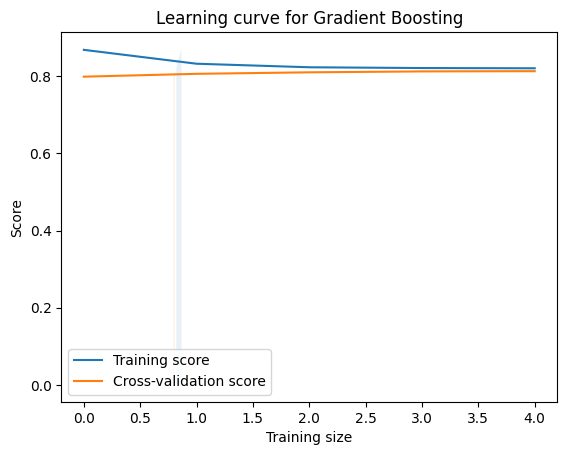

Train score for 'Gradient Boosting': 0.8207943262411348
Test score for 'Gradient Boosting': 0.8109026761896566
Cross validation score for 'Gradient Boosting':0.8131063829787234



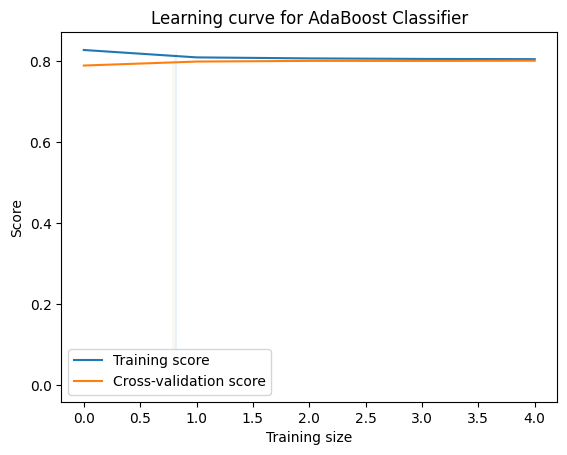

Train score for 'AdaBoost Classifier': 0.8052482269503546
Test score for 'AdaBoost Classifier': 0.8011358747095775
Cross validation score for 'AdaBoost Classifier':0.8017021276595745



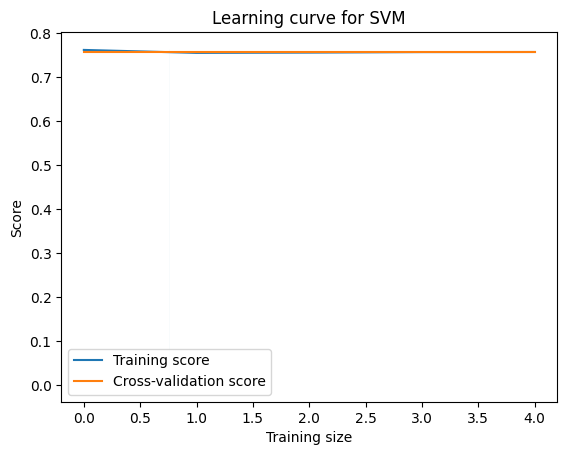

Train score for 'SVM': 0.7571347517730497
Test score for 'SVM': 0.7585405731004217
Cross validation score for 'SVM':0.7571347517730496



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

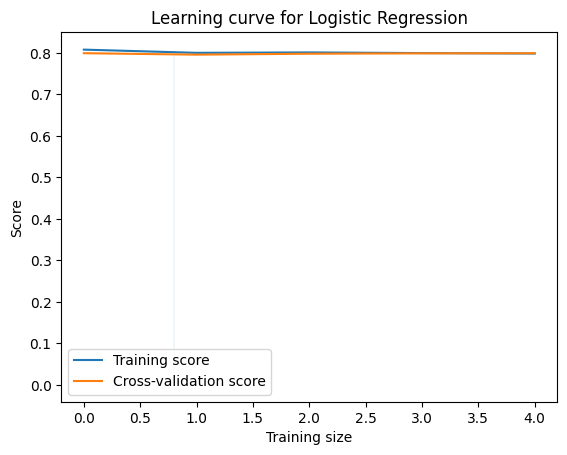

Train score for 'Logistic Regression': 0.7986666666666666
Test score for 'Logistic Regression': 0.793004044402375
Cross validation score for 'Logistic Regression':0.7990921985815602



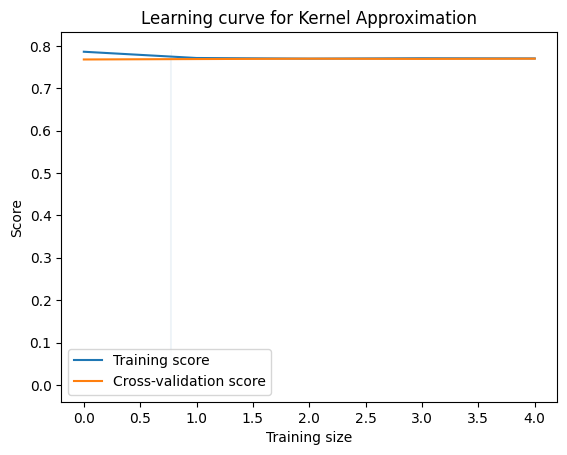

Train score for 'Kernel Approximation': 0.7685390070921986
Test score for 'Kernel Approximation': 0.7689097323810343
Cross validation score for 'Kernel Approximation':0.7695319148936172



In [49]:
# Models dictionary
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost Classifier":  AdaBoostClassifier(),
     "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Kernel Approximation": Pipeline([
        ("feature_map", Nystroem()),
        ("svm", LinearSVC())
    ]),


}

train_scores = {}
test_scores = {}
cv_scores = {}

for name, model in models.items():
    # Fit with train data
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))

    # Store the scores in dictionaries
    train_scores[name] = [train_score]
    test_scores[name] = [test_score]
    cv_scores[name] = [cv_score]

    # Learning Curve
    train_sizes, train_scores_data, test_scores_data = learning_curve(model, X_train, y_train, cv=10, n_jobs=-1)

    # Calculate means and standard deviations
    train_scores_mean = np.mean(train_scores_data, axis=1)
    train_scores_std = np.std(train_scores_data, axis=1)
    test_scores_mean = np.mean(test_scores_data, axis=1)
    test_scores_std = np.std(test_scores_data, axis=1)

    # Store learning curve data
    train_scores[name].extend(train_scores_mean.tolist())
    test_scores[name].extend(test_scores_mean.tolist())

    # Plot learning curve
    plt.plot(train_scores_mean, label="Training score")
    plt.fill_between(train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
    plt.plot(test_scores_mean, label="Cross-validation score")
    plt.fill_between(test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
    plt.xlabel("Training size")
    plt.ylabel("Score")
    plt.title("Learning curve for %s" % name)
    plt.legend()
    plt.show()

    # Validate scores
    print("Train score for '%s': %s" % (name, str(train_score)))
    print("Test score for '%s': %s" % (name, str(test_score)))
    print("Cross validation score for '%s':%s" % (name, str(cv_score)))
    print("")

